<a href="https://colab.research.google.com/github/mia2465/PMLTermProject/blob/main/DischargedVsDeceasedTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##### Copyright 2020 The TensorFlow Authors.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Convolutional Variational Autoencoder

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/generative/cvae">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/generative/cvae.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/generative/cvae.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/generative/cvae.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This code is largely alterations from TensorFlows official example for VAE's. The links for this official site and lisensing information are shown above this cell.

This VAE variation is specifically for testing how well the VAE does at differentiating the CT of someone who was discharged from the hospital after contracting COVID-19 and someone who for whom the infection was fatal. To do this this script was meant to be run twice. The difference between the two experiments/script running is the testing data set. For one running of the script the testing data contains those who were discharged from the hospital. For another the testing data set is made up of those who were deceased. The found error between the generated images are saved for both groups in order to analyze later to see if the amount of error gives indicated as to patient outcome.

## Setup

In [ ]:
!pip install tensorflow-probability

# to generate gifs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs
#!pip install pydicom

from google.colab import drive
drive.mount('/content/drive')

from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time
import pandas as pd


  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-shhw94ga
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-shhw94ga
  Resolved https://github.com/tensorflow/docs to commit 3eac15bae13ea389957e7eb499252ef5da6c9f01
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2024.4.30.68232-py3-none-any.whl size=182538 sha256=472e01804768effb71f53913785849cb91076778075eb8cb1ce83a4e409b601b
  Stored in directory: /tmp/pip-ephem-wheel-cache-jpj_3o7c/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs
Mounted at /content/drive


This set is the same REGARDLESS of testing set.

In [ ]:
#Training set for Discharged vs Deceased
train_dataset = tf.data.Dataset.load('/content/drive/MyDrive/AllDICOM/trainSet128Healthy')

Only ONE testing set and assosiated ratios should be ran for a single script/experiment. Either Deceased or Discharged patient outcome.

In [ ]:
#Testing set for DECEASED pateint outcome
test_dataset = tf.data.Dataset.load('/content/drive/MyDrive/AllDICOM/testSetDeceased128')

In [ ]:
#Testing set for DISCHARGED pateint outcome
test_dataset = tf.data.Dataset.load('/content/drive/MyDrive/AllDICOM/testSetDischarged128')

In [ ]:
# Ratios for testing with DISCHARGED patient outcome testing set
train_size =  5,322
batch_size = 32
test_size =  592

In [ ]:
# Ratios for testing with DECEASED patient outcome testing set
train_size =  5,322
batch_size = 32
test_size =  2,982

These functions are necessary to run the VAE

In [ ]:
def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [ ]:
# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]

In [ ]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

This is the cell that actually runs all of the required testing for the VAE. This VAE uses the most optimal latent space and filter sizes as shown by previous experiments.

This script must be run TWICE. One in which the deceased test data set is used, and one in which the discharged set is used.

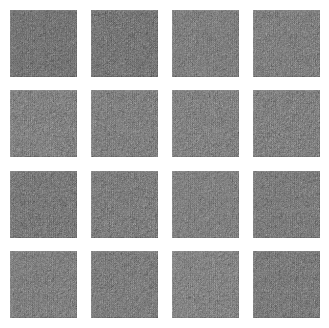

Epoch: 1, Test set ELBO: -7838.56591796875, time elapse for current epoch: 20.502089977264404


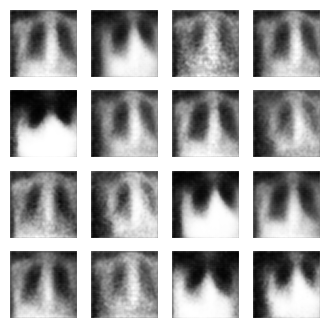

Epoch: 2, Test set ELBO: -6797.53466796875, time elapse for current epoch: 15.535170555114746


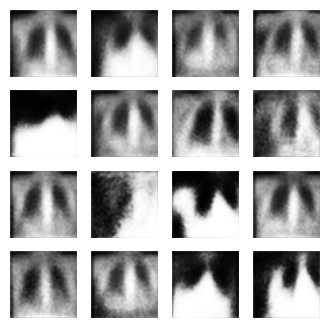

Epoch: 3, Test set ELBO: -6643.63134765625, time elapse for current epoch: 15.378299713134766


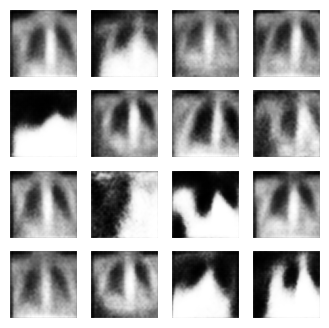

Epoch: 4, Test set ELBO: -6574.248046875, time elapse for current epoch: 15.307132005691528


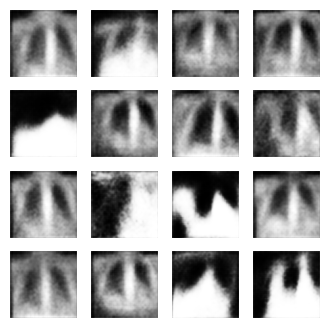

Epoch: 5, Test set ELBO: -6545.89990234375, time elapse for current epoch: 15.192907810211182


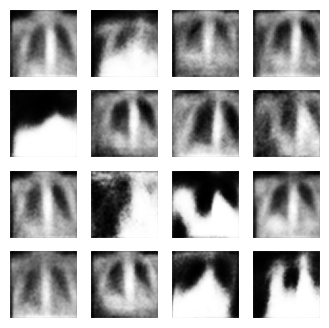

Epoch: 6, Test set ELBO: -6552.65087890625, time elapse for current epoch: 15.321588516235352


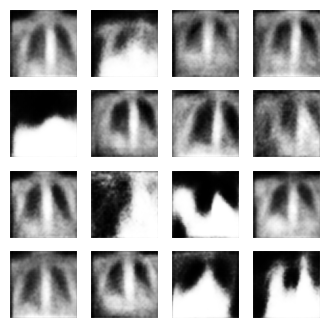

Epoch: 7, Test set ELBO: -6523.02587890625, time elapse for current epoch: 15.4505774974823


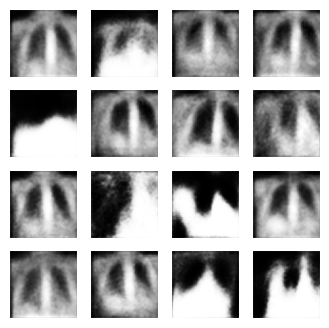

Epoch: 8, Test set ELBO: -6501.02490234375, time elapse for current epoch: 15.348527908325195


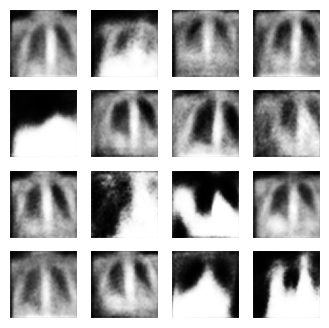

Epoch: 9, Test set ELBO: -6517.61962890625, time elapse for current epoch: 15.26476788520813


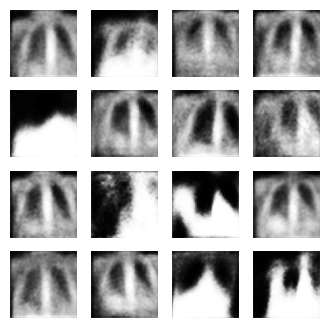

Epoch: 10, Test set ELBO: -6477.91796875, time elapse for current epoch: 15.27698826789856


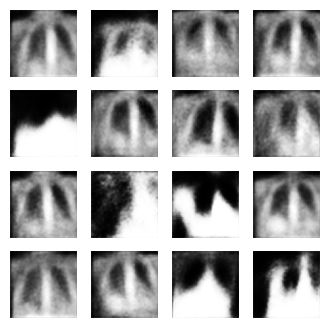

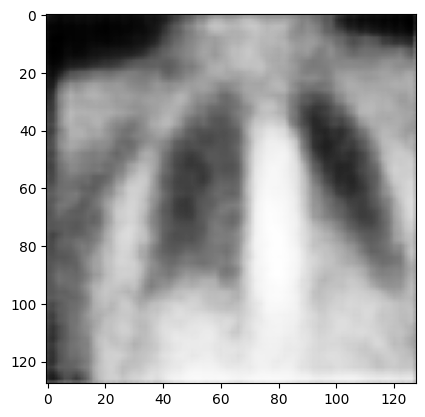

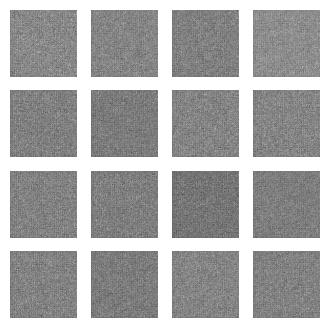

Epoch: 1, Test set ELBO: -7818.18505859375, time elapse for current epoch: 17.299421072006226


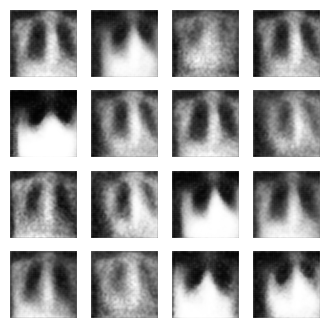

Epoch: 2, Test set ELBO: -6836.24365234375, time elapse for current epoch: 15.417532205581665


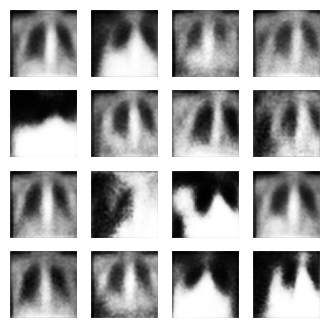

Epoch: 3, Test set ELBO: -6627.75830078125, time elapse for current epoch: 15.398329019546509


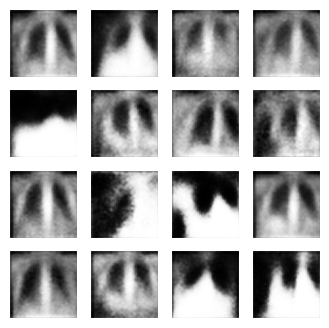

Epoch: 4, Test set ELBO: -6563.71533203125, time elapse for current epoch: 15.311123371124268


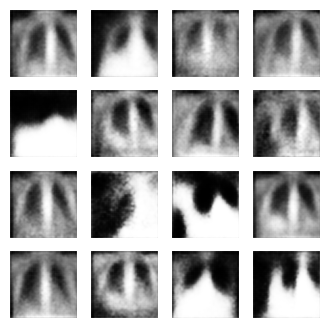

Epoch: 5, Test set ELBO: -6550.44287109375, time elapse for current epoch: 15.284895896911621


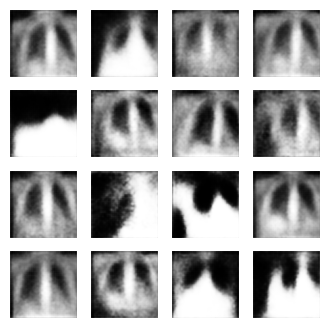

Epoch: 6, Test set ELBO: -6521.66943359375, time elapse for current epoch: 15.366473197937012


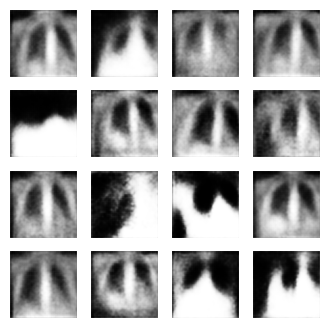

Epoch: 7, Test set ELBO: -6475.33984375, time elapse for current epoch: 15.356614112854004


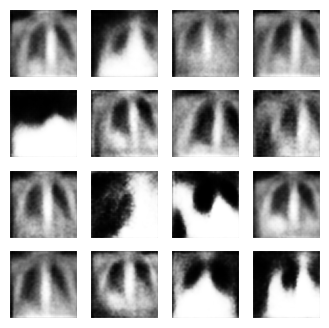

Epoch: 8, Test set ELBO: -6478.40625, time elapse for current epoch: 15.33086371421814


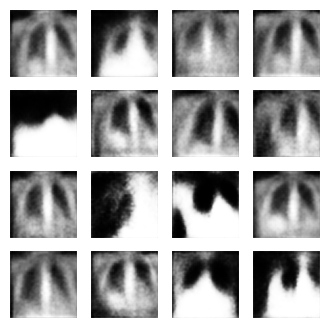

Epoch: 9, Test set ELBO: -6493.11962890625, time elapse for current epoch: 15.362431287765503


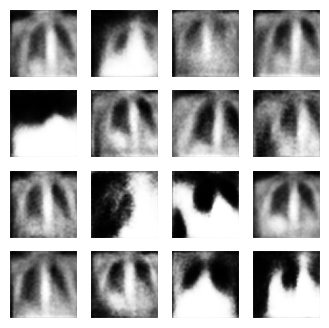

Epoch: 10, Test set ELBO: -6508.05615234375, time elapse for current epoch: 15.30156683921814


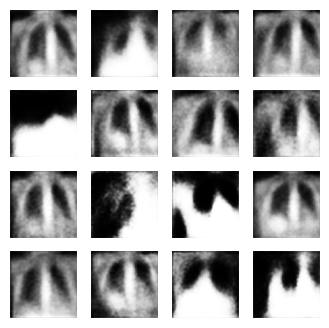

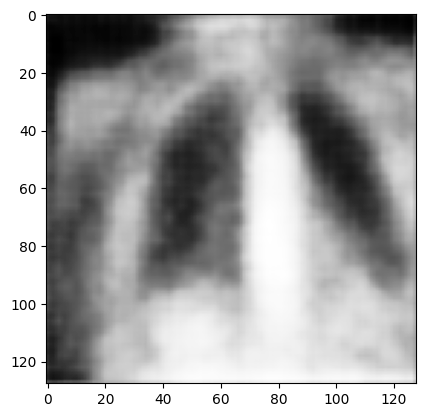

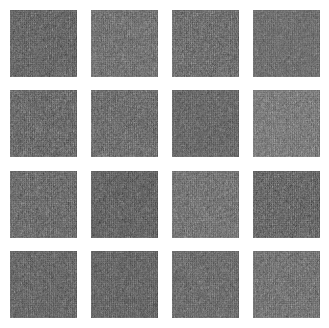

Epoch: 1, Test set ELBO: -7650.1708984375, time elapse for current epoch: 18.10616397857666


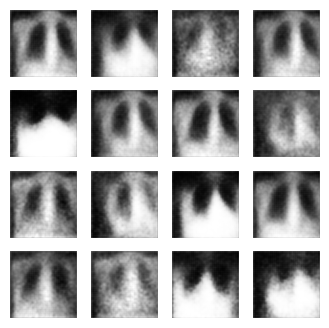

Epoch: 2, Test set ELBO: -6799.0009765625, time elapse for current epoch: 15.418076753616333


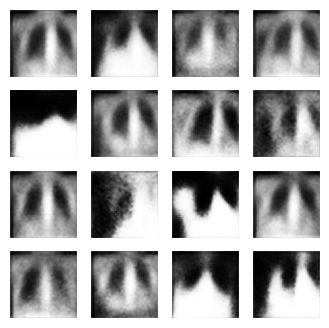

Epoch: 3, Test set ELBO: -6595.61328125, time elapse for current epoch: 15.41527247428894


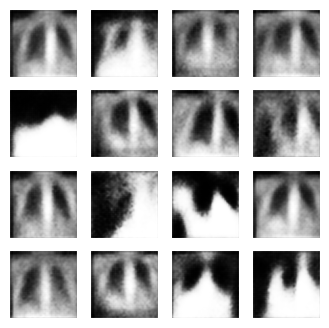

Epoch: 4, Test set ELBO: -6544.89208984375, time elapse for current epoch: 15.37255597114563


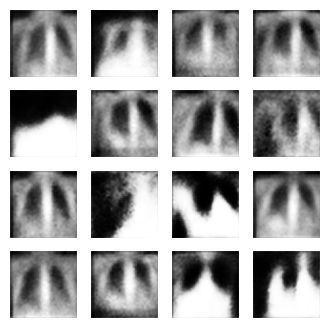

Epoch: 5, Test set ELBO: -6506.3515625, time elapse for current epoch: 15.303645133972168


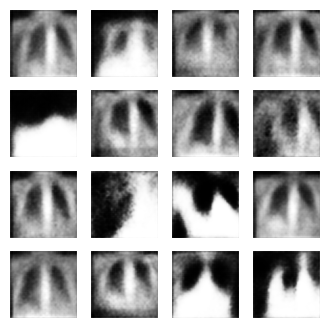

Epoch: 6, Test set ELBO: -6527.12255859375, time elapse for current epoch: 15.349726676940918


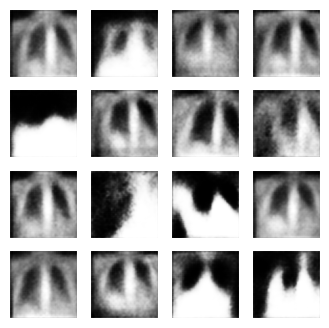

Epoch: 7, Test set ELBO: -6463.17919921875, time elapse for current epoch: 15.40407657623291


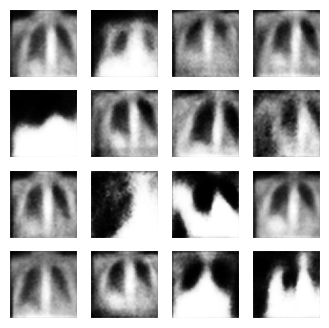

Epoch: 8, Test set ELBO: -6461.25341796875, time elapse for current epoch: 15.360211610794067


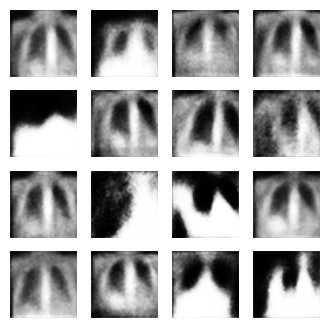

Epoch: 9, Test set ELBO: -6478.2548828125, time elapse for current epoch: 15.365115642547607


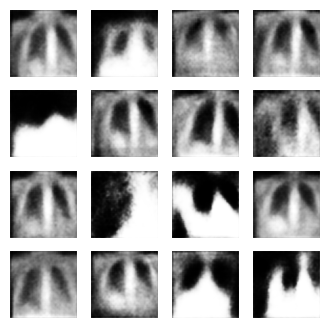

Epoch: 10, Test set ELBO: -6463.88720703125, time elapse for current epoch: 15.348506927490234


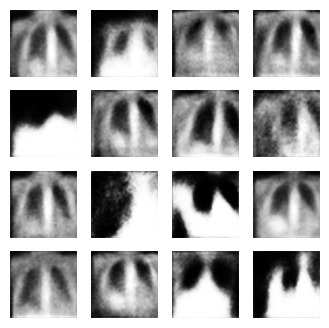

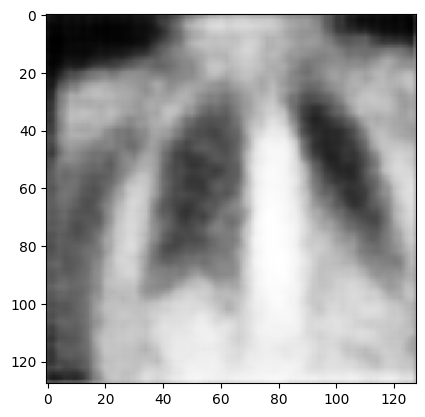

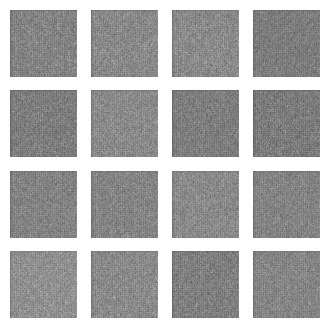

Epoch: 1, Test set ELBO: -7949.08740234375, time elapse for current epoch: 20.496885299682617


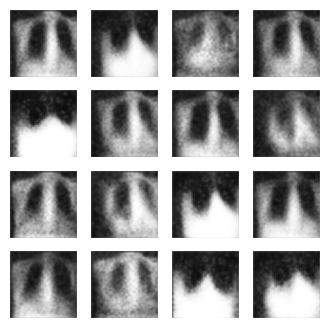

Epoch: 2, Test set ELBO: -6814.052734375, time elapse for current epoch: 15.408234596252441


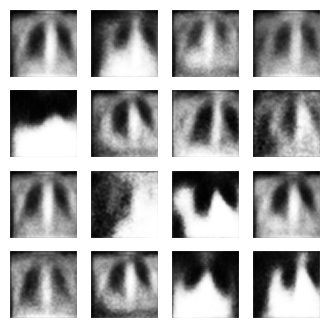

Epoch: 3, Test set ELBO: -6739.400390625, time elapse for current epoch: 15.465812683105469


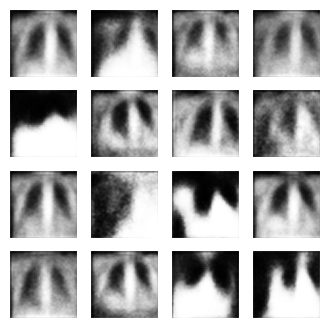

Epoch: 4, Test set ELBO: -6631.9189453125, time elapse for current epoch: 15.40156078338623


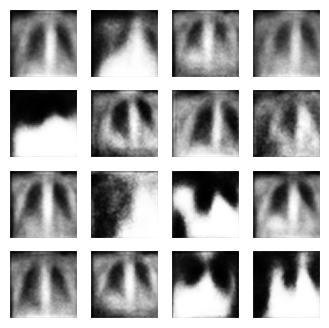

Epoch: 5, Test set ELBO: -6607.29931640625, time elapse for current epoch: 15.278838872909546


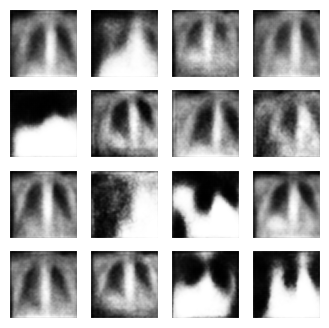

Epoch: 6, Test set ELBO: -6593.615234375, time elapse for current epoch: 15.321834325790405


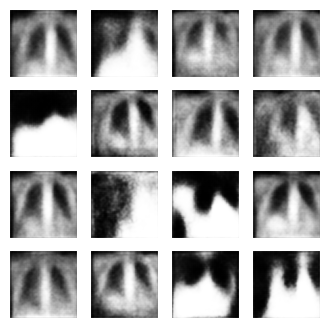

Epoch: 7, Test set ELBO: -6581.3349609375, time elapse for current epoch: 15.44100022315979


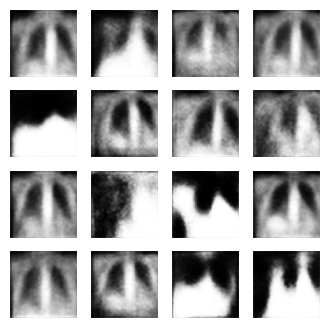

Epoch: 8, Test set ELBO: -6548.2744140625, time elapse for current epoch: 15.36626648902893


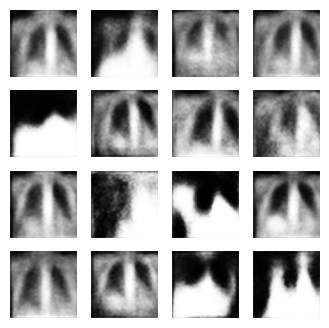

Epoch: 9, Test set ELBO: -6537.158203125, time elapse for current epoch: 15.345491886138916


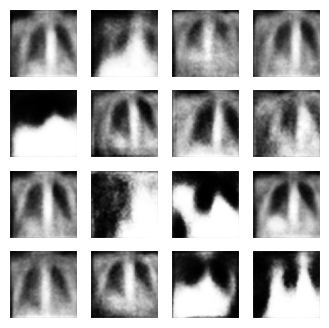

Epoch: 10, Test set ELBO: -6567.44921875, time elapse for current epoch: 15.404553651809692


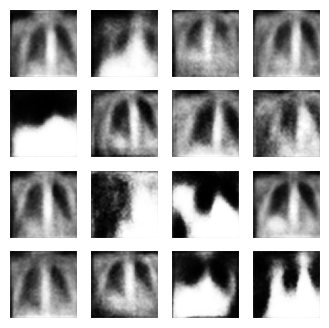

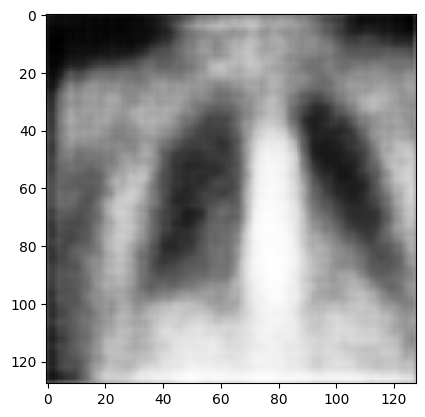

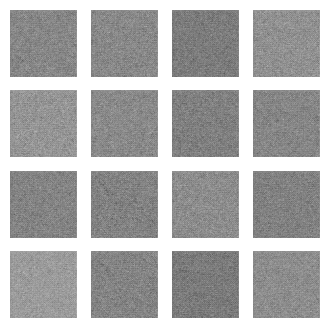

Epoch: 1, Test set ELBO: -7548.390625, time elapse for current epoch: 17.324246406555176


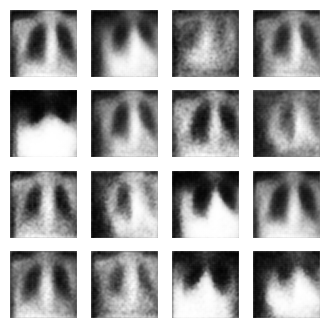

Epoch: 2, Test set ELBO: -6760.1357421875, time elapse for current epoch: 15.470276832580566


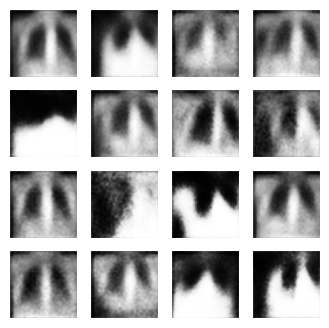

Epoch: 3, Test set ELBO: -6620.775390625, time elapse for current epoch: 15.425675392150879


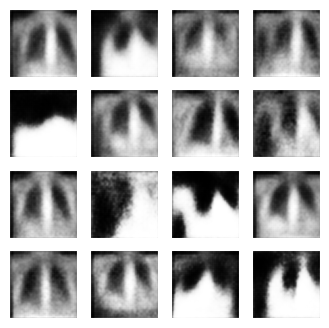

Epoch: 4, Test set ELBO: -6560.82080078125, time elapse for current epoch: 15.346963882446289


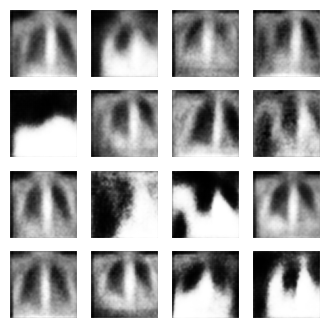

Epoch: 5, Test set ELBO: -6523.8544921875, time elapse for current epoch: 15.297933340072632


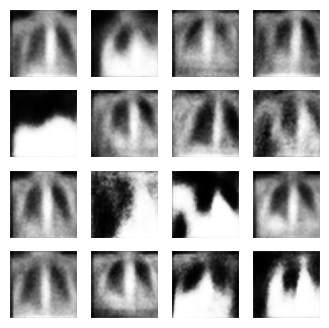

Epoch: 6, Test set ELBO: -6531.4755859375, time elapse for current epoch: 15.33087158203125


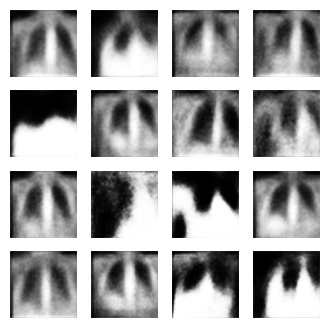

Epoch: 7, Test set ELBO: -6561.02880859375, time elapse for current epoch: 15.364183902740479


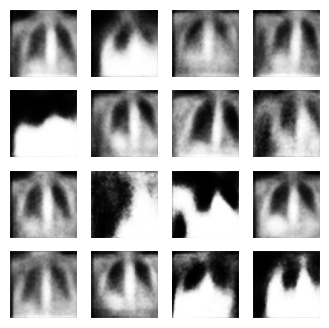

Epoch: 8, Test set ELBO: -6497.7080078125, time elapse for current epoch: 15.430880546569824


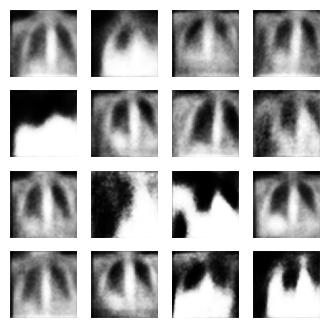

Epoch: 9, Test set ELBO: -6483.91455078125, time elapse for current epoch: 15.364451885223389


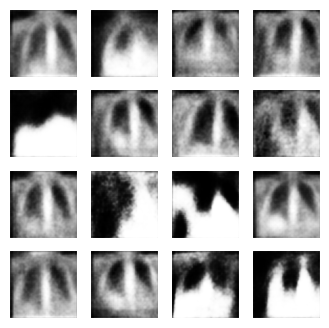

Epoch: 10, Test set ELBO: -6525.88037109375, time elapse for current epoch: 15.350302457809448


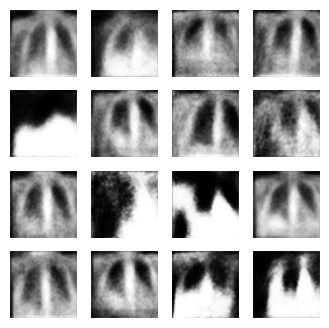

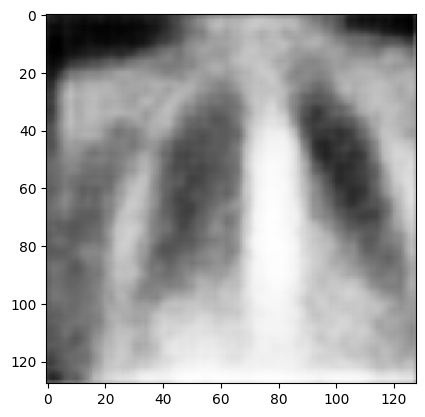

In [ ]:


for latentVar in [8]:
  numKfold = 5
  epochs = 10
  latent_dim = latentVar
  num_examples_to_generate = 16
  batchSize = 31
  totalError = np.empty(shape=(numKfold,batchSize-1))
  for kFold in range(numKfold):
    #________MODEL___________
    class CVAE(tf.keras.Model):
      """Convolutional variational autoencoder."""

      def __init__(self, latent_dim):
        super(CVAE, self).__init__()
        self.latent_dim = latent_dim
        self.encoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(128, 128, 1)),
                tf.keras.layers.Conv2D(
                    filters=32*3, kernel_size=3, strides=(2, 2), activation='relu'),
                tf.keras.layers.Conv2D(
                    filters=64*3, kernel_size=3, strides=(2, 2), activation='relu'),
                tf.keras.layers.Flatten(),
                # No activation
                tf.keras.layers.Dense(latent_dim + latent_dim),
            ]
        )

        self.decoder = tf.keras.Sequential(
            [
                tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
                tf.keras.layers.Dense(units=32*32*32, activation=tf.nn.relu),
                tf.keras.layers.Reshape(target_shape=(32, 32, 32)),
                tf.keras.layers.Conv2DTranspose(
                    filters=64*3, kernel_size=3, strides=2, padding='same',
                    activation='relu'),
                tf.keras.layers.Conv2DTranspose(
                    filters=32*3, kernel_size=3, strides=2, padding='same',
                    activation='relu'),
                # No activation
                tf.keras.layers.Conv2DTranspose(
                    filters=1, kernel_size=3, strides=1, padding='same'),
            ]
        )

      @tf.function
      def sample(self, eps=None):
        if eps is None:
          eps = tf.random.normal(shape=(100, self.latent_dim))
        return self.decode(eps, apply_sigmoid=True)

      def encode(self, x):
        mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
        return mean, logvar

      def reparameterize(self, mean, logvar):
        eps = tf.random.normal(shape=mean.shape)
        return eps * tf.exp(logvar * .5) + mean

      def decode(self, z, apply_sigmoid=False):
        logits = self.decoder(z)
        if apply_sigmoid:
          probs = tf.sigmoid(logits)
          return probs
        return logits

    optimizer = tf.keras.optimizers.Adam(1e-4)


    def log_normal_pdf(sample, mean, logvar, raxis=1):
      log2pi = tf.math.log(2. * np.pi)
      return tf.reduce_sum(
          -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
          axis=raxis)


    def compute_loss(model, x):
      mean, logvar = model.encode(x)
      z = model.reparameterize(mean, logvar)
      x_logit = model.decode(z)
      cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
      logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
      logpz = log_normal_pdf(z, 0., 0.)
      logqz_x = log_normal_pdf(z, mean, logvar)
      return -tf.reduce_mean(logpx_z + logpz - logqz_x)


    @tf.function
    def train_step(model, x, optimizer):
      """Executes one training step and returns the loss.

      This function computes the loss and gradients, and uses the latter to
      update the model's parameters.
      """
      with tf.GradientTape() as tape:
        loss = compute_loss(model, x)
      gradients = tape.gradient(loss, model.trainable_variables)
      optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    random_vector_for_generation = tf.random.normal(
      shape=[num_examples_to_generate, latent_dim])
    model = CVAE(latent_dim)

    assert batch_size >= num_examples_to_generate
    for test_batch in test_dataset.take(1):
      test_sample = test_batch[0:num_examples_to_generate, :, :, :]
    #_______________

    generate_and_save_images(model, 0, test_sample)

    for epoch in range(1, epochs + 1):
      start_time = time.time()
      for train_x in train_dataset:
        train_step(model, train_x, optimizer)
      end_time = time.time()

      loss = tf.keras.metrics.Mean()
      for test_x in test_dataset:
        loss(compute_loss(model, test_x))
      elbo = -loss.result()
      #display.clear_output(wait=False)
      print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
            .format(epoch, elbo, end_time - start_time))
      generate_and_save_images(model, epoch, test_sample)

    OrigionalImages = np.empty(shape=(batchSize, 128,128))
    VAEGeneratedImages = np.empty(shape=(batchSize, 128,128))

    for imageNum in range(batchSize):
      #For recreating images from testing set to compare to VAE produced
      test_image = test_batch[imageNum, :, :,:].numpy()
      normalized_image = (test_image-np.min(test_image))/(np.max(test_image)-np.min(test_image))
      OrigionalImages[imageNum] = test_image.reshape((128, 128))
      #For producing images that have been encoded and decoded by the VAE
      VAEAlteredImage = test_batch[imageNum:imageNum+1, :, :,:].numpy()
      mean, logvar = model.encode(VAEAlteredImage)
      z = model.reparameterize(mean, logvar)
      predictions = model.sample(z)
      VAEGeneratedImages[imageNum] = tf.reshape(predictions[0], (128, 128))

    plt.imshow(OrigionalImages[0],cmap='Greys_r')
    plt.imshow( VAEGeneratedImages[0],cmap='Greys_r')

    #For directly comparing the error between the origional and produce dimages
    for imageNum in range(batchSize -1 ):
      for col in range(128):
        for row in range(128):
          totalError[kFold, imageNum] += abs(OrigionalImages[imageNum][col,row] - VAEGeneratedImages[imageNum][col,row])

  # THIS MUST BE CHANGED BASED ON WHICH DATA SET IS BEING USED
  #np.save("/content/drive/MyDrive/AllDICOM/ModelDischarged", totalError)
  np.save("/content/drive/MyDrive/AllDICOM/ModelDeceased", totalError)


